In [1]:
import matplotlib.pyplot as plt
from dataset_loader import WasteDatasetLoader
from preprocessing import DataPreprocessor
import numpy as np
import tensorflow as tf

Loading TrashNet dataset...


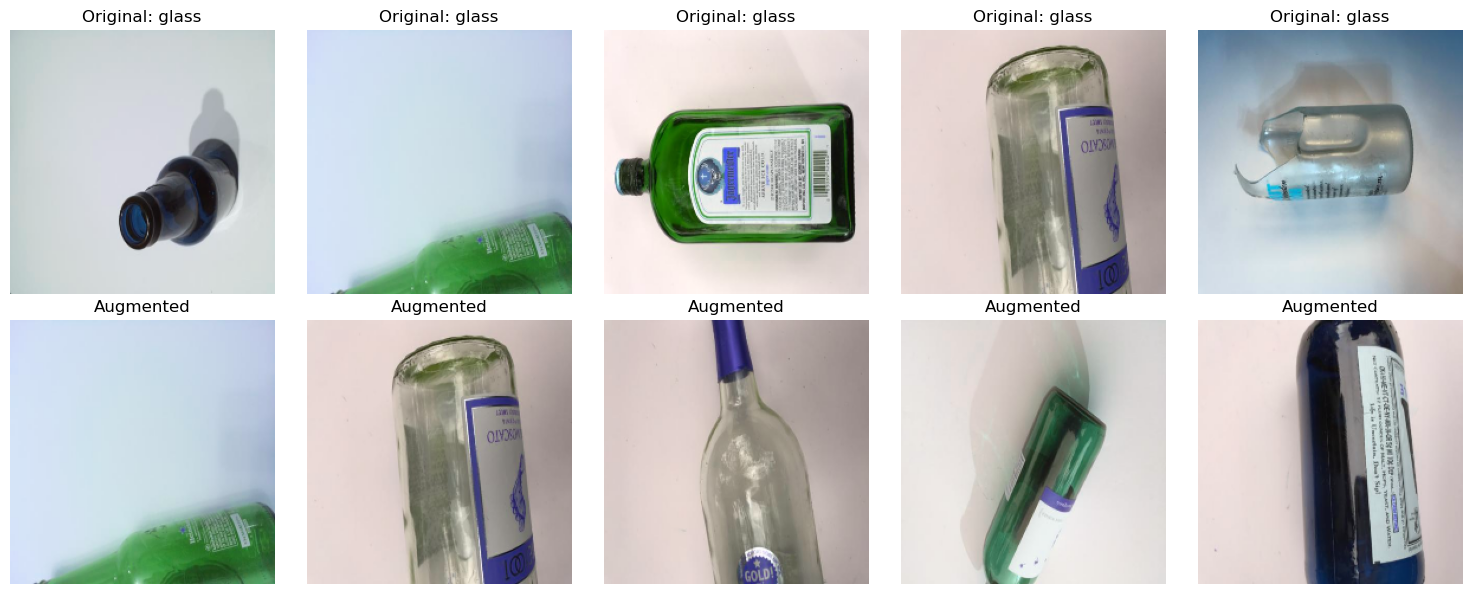


Dataset Split Information:
--------------------------------------------------
Training set: (14, 224, 224, 3)
Validation set: (3, 224, 224, 3)
Test set: (3, 224, 224, 3)


In [2]:

def test_preprocessing():
    """Test the preprocessing pipeline"""
    
    # Load a small subset of data
    loader = WasteDatasetLoader()
    images, labels = loader.load_trashnet()
    
    # Initialize preprocessor
    preprocessor = DataPreprocessor()
    
    # Process images and create train/val/test split
    processed_images, processed_labels = preprocessor.preprocess_images(images[:10], labels[:10])
    data_splits = preprocessor.create_train_val_test_split(processed_images, processed_labels)
    
    # Visualize original vs augmented images
    plt.figure(figsize=(15, 6))
    categories = ['glass', 'paper', 'cardboard', 'plastic', 'metal', 'trash']
    
    for i in range(5):
        # Original image
        plt.subplot(2, 5, i+1)
        plt.imshow(images[i].astype('uint8'))
        plt.title(f'Original: {categories[labels[i]]}')
        plt.axis('off')
        
        # Processed image
        plt.subplot(2, 5, i+6)
        plt.imshow((processed_images[i*2+1] * 255).astype('uint8'))
        plt.title('Augmented')
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print dataset split information
    print("\nDataset Split Information:")
    print("-" * 50)
    print(f"Training set: {data_splits['train'][0].shape}")
    print(f"Validation set: {data_splits['val'][0].shape}")
    print(f"Test set: {data_splits['test'][0].shape}")

# Run the test
test_preprocessing()